In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

## read trait information

In [2]:
df_LA = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_LA.csv")
df_SLA = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_SLA.csv")
df_LDMC = pd.read_csv(r"F:\wenqu\DOE_Arctic_project\spectral\combine_LDMC.csv")

In [3]:
df_SLA

,site,vol_moisture,weighted_sla,weighted_la,weighted_LDMC,b1_mean,b2_mean,b3_mean,b4_mean,b5_mean,...,b113_std,b114_std,b115_std,b116_std,b117_std,b118_std,b119_std,b120_std,b121_std,b122_std
0,site2a_qu_10,11.500000,103.274730,7.685520,0.431687,0.025130,0.021349,0.017708,0.013147,0.011564,...,0.066307,0.060369,0.056838,0.062961,0.058079,0.053972,0.054655,0.053167,0.059931,0.066890
1,site2a_qu_11,55.700000,80.669833,1.895693,0.533587,0.037116,0.028136,0.027556,0.022787,0.022009,...,0.147961,0.148489,0.137109,0.141940,0.147016,0.137352,0.143938,0.143416,0.132508,0.157942
2,site2a_qu_12,13.166667,102.828431,1.776364,0.756281,0.009131,0.014486,0.009359,0.010267,0.008580,...,0.080970,0.077439,0.082271,0.070964,0.074677,0.075373,0.075561,0.075743,0.077886,0.089153
3,site2a_qu_13,50.900000,82.917004,1.410099,0.497387,0.013592,0.017636,0.015679,0.011988,0.009930,...,0.048441,0.044967,0.039642,0.039218,0.035964,0.038140,0.039319,0.033442,0.040686,0.052364
4,site2a_qu_14,3.566667,30.659484,2.730000,4.521977,0.034507,0.027230,0.023196,0.019779,0.017947,...,0.076851,0.074534,0.069335,0.064276,0.069769,0.071846,0.074753,0.071547,0.067606,0.079951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,site6_q_2,25.066667,97.318287,18.487914,0.380857,0.001883,0.004552,0.005339,0.009010,0.011587,...,0.040810,0.036970,0.024927,0.026767,0.024191,0.051995,0.027982,0.026825,0.031034,0.045559
59,site6_q_3,55.933333,93.647522,7.037150,0.372395,0.002346,0.003304,0.004541,0.007759,0.009294,...,0.039503,0.033722,0.023706,0.025587,0.030969,0.028866,0.022222,0.018224,0.027983,0.041257
60,site6_q_6,63.300000,97.080215,11.953308,0.460407,0.000474,0.003555,0.005241,0.007608,0.008677,...,0.028041,0.027656,0.021054,0.019241,0.022796,0.018238,0.017797,0.021156,0.021885,0.032827
61,site6_q_8,56.433333,83.864292,6.134349,1.607404,0.002891,0.003770,0.005975,0.007441,0.008586,...,0.029016,0.025141,0.021974,0.022875,0.023644,0.026692,0.022467,0.021704,0.025153,0.046095


## get band informationn

In [75]:
b_name_mean = []
b_name_std = []
for i in range(1, 123):
    b_mean = 'b' + str(i) + '_mean'
    b_name_mean.append(b_mean)
    b_std = 'b' + str(i) + '_std'
    b_name_std.append(b_std)
band_name = b_name_mean + b_name_std
band_name = np.array(band_name)
# band_name

## prepare y variable for each traits

In [17]:
y_weighted_sla = df_SLA['weighted_sla'].to_numpy()
y_weighted_la = df_LA['weighted_la'].to_numpy()
y_weighted_LDMC = df_LDMC['weighted_LDMC'].to_numpy()

vol_mois_sla = np.array(df_SLA['vol_moisture'])
vol_mois_la = np.array(df_LA['vol_moisture'])
vol_mois_LDMC = np.array(df_LDMC['vol_moisture'])


x_sla = np.array(df_SLA[band_name])
x_la = np.array(df_LA[band_name])
x_ldmc = np.array(df_LDMC[band_name])




## prepare site label information for each trait

In [48]:
labels_sla = [] 
for i in range(len(df_SLA['site'])):
    
    site_name = df_SLA['site'][i].split("_")[0]

    labels_sla.append(site_name)

In [49]:
labels_la = [] 
for i in range(len(df_LA['site'])):    
    site_name = df_LA['site'][i].split("_")[0]
    labels_la.append(site_name)

In [50]:
labels_ldmc = [] 
for i in range(len(df_LDMC['site'])):    
    site_name = df_LDMC['site'][i].split("_")[0]
    labels_ldmc.append(site_name)

In [74]:
print(len(labels_sla), len(labels_la), len(labels_ldmc))

63 64 61


## leave one out cross validation plsr model

In [25]:
def pls_variable_selection(X, y, max_comp):
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp,X.shape[1]))
 
    # Loop over the number of PLS components
    for i in range(max_comp):
        
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y)
        
        # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:,0]))
 
        # Sort spectra accordingly 
        Xc = X[:,sorted_ind]
 
        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
 
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
 
            mse[i,j] = mean_squared_error(y, y_cv)
    
        comp = 100*(i+1)/(max_comp)
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # # Calculate and print the position of minimum in MSE
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))
 
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ",mseminy[0])
    print('Optimised MSEP ', mse[mseminx,mseminy][0])
    stdout.write("\n")
#     plt.imshow(mse, interpolation=None)
#     plt.show()
 
 
    # Calculate PLS with optimal components and export values
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

## train the model - plot the result based on different site label

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_predict


def simple_pls_cv(X, y, n_comp, labels):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y)
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y, y_cv, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'red'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'P', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}
        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i], marker=label_dict.get(label, label_dict['site6'])['marker'],
                                     c=label_dict.get(label, label_dict['site6'])['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)

        ax.plot(z[1]+z[0]*y, y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()


## log transform y variable

In [69]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

## SLA trait model performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  207
Optimised MSEP  0.05442305513736815



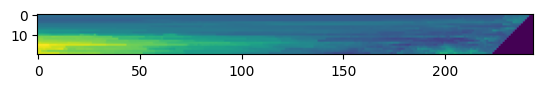

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [70]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(x_sla, log_y_weighted_sla, 20)


In [81]:
    # Calculate PLS with optimal components and export values
pls_sla = PLSRegression(n_components=13)
pls_sla.fit(x_sla, log_y_weighted_sla)

target = pls_sla.coef_[:,0]
sorted_ind_sla = np.argsort(np.abs(target))[::-1]
sorted_value = target[sorted_ind_sla]

print(x_sla.shape, sorted_ind_sla.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_sla = band_name[sorted_ind_sla][:37]
print(band_name_sla.shape, band_name_sla)

(63, 244) (244,)
(37,) ['b107_std' 'b8_std' 'b12_std' 'b25_std' 'b9_std' 'b7_std' 'b98_std'
 'b3_mean' 'b17_std' 'b113_std' 'b121_mean' 'b5_std' 'b9_mean' 'b60_mean'
 'b2_mean' 'b122_mean' 'b103_std' 'b16_std' 'b59_mean' 'b8_mean'
 'b118_mean' 'b52_std' 'b10_std' 'b116_std' 'b97_std' 'b100_std'
 'b61_mean' 'b119_mean' 'b4_std' 'b7_mean' 'b13_std' 'b59_std' 'b91_mean'
 'b102_std' 'b91_std' 'b41_std' 'b1_mean']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [89]:
sorted_value[:37]

array([-0.37141252, -0.34020232, -0.30302519, -0.27747774,  0.27342114,
       -0.26816383, -0.25478467, -0.2515928 ,  0.24547071,  0.2326327 ,
       -0.22971601,  0.2174161 ,  0.21034471,  0.20926814,  0.20390816,
       -0.19568387, -0.19469165,  0.18169573,  0.18036744, -0.17123101,
       -0.16138079,  0.16018922, -0.15041061,  0.14754808,  0.14546097,
       -0.14544003,  0.14381817, -0.14326747,  0.13979797,  0.13367285,
        0.13315349, -0.13309515,  0.13130012, -0.13088189,  0.13062391,
       -0.12923637, -0.1271902 ])

R2 calib: 0.859
R2 CV: 0.416
MSE calib: 109.470
MSE CV: 454.126


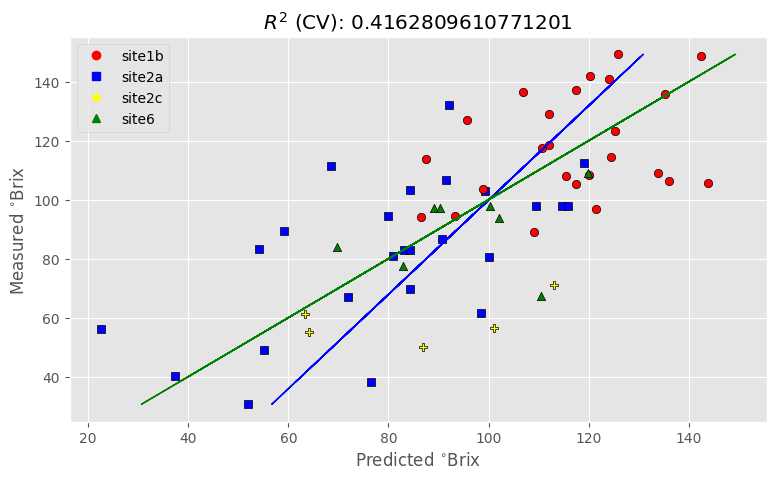

In [71]:
simple_pls_cv(opt_Xc, y_weighted_sla, ncomp, labels_sla)

# LA trait model performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  215
Optimised MSEP  0.31097104339275405



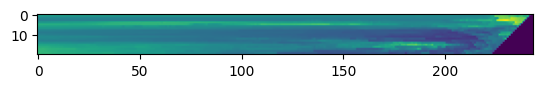

R2 calib: 0.905
R2 CV: 0.782
MSE calib: 0.129
MSE CV: 0.293


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


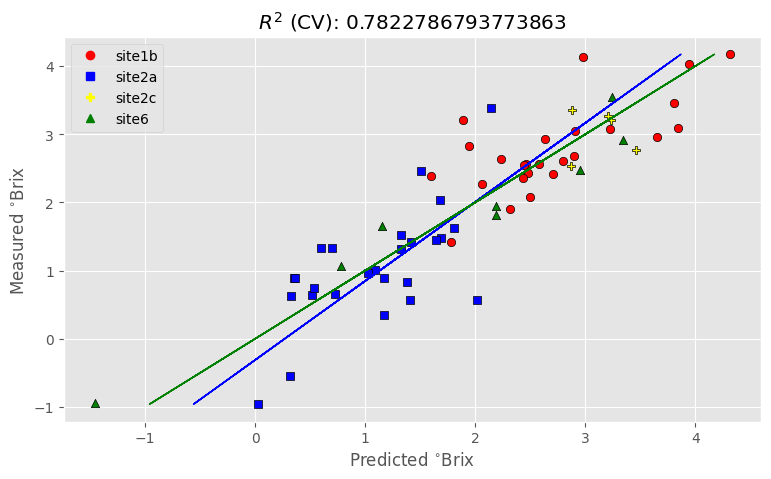

In [72]:
opt_Xc_la, ncomp_la, wav_la, sorted_ind_la = pls_variable_selection(x_la, log_y_weighted_la, 20)
simple_pls_cv(opt_Xc_la, log_y_weighted_la, ncomp_la, labels_la)

In [87]:
pls_la = PLSRegression(n_components=12)
pls_la.fit(x_la, log_y_weighted_la)

target_la = pls_la.coef_[:,0]
sorted_ind_la = np.argsort(np.abs(target_la))[::-1]
sorted_value_la = target[sorted_ind_la]

print(x_la.shape, sorted_ind_la.shape)

# Xc = x_sla[:,sorted_ind_sla]
band_name_la = band_name[sorted_ind_la][:29]
print(band_name_la.shape, band_name_la)

(64, 244) (244,)
(29,) ['b122_std' 'b108_std' 'b4_mean' 'b108_mean' 'b12_std' 'b3_std'
 'b109_mean' 'b105_std' 'b107_mean' 'b5_mean' 'b110_mean' 'b103_std'
 'b15_mean' 'b4_std' 'b120_std' 'b10_std' 'b26_std' 'b1_mean' 'b120_mean'
 'b75_mean' 'b121_mean' 'b2_mean' 'b65_std' 'b119_mean' 'b32_std' 'b8_std'
 'b107_std' 'b34_std' 'b52_std']


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


## LDMC trait performance

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


5% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


15% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


25% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


35% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


45% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


55% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


65% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


75% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


85% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


95% completed

C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  20
Wavelengths to be discarded  215
Optimised MSEP  0.10351556351568988



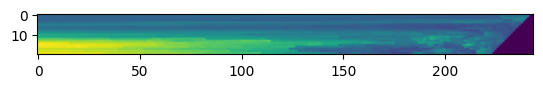

R2 calib: 0.898
R2 CV: 0.398
MSE calib: 0.019
MSE CV: 0.109


C:\Users\15086\anaconda3\envs\wenqu_gdal\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


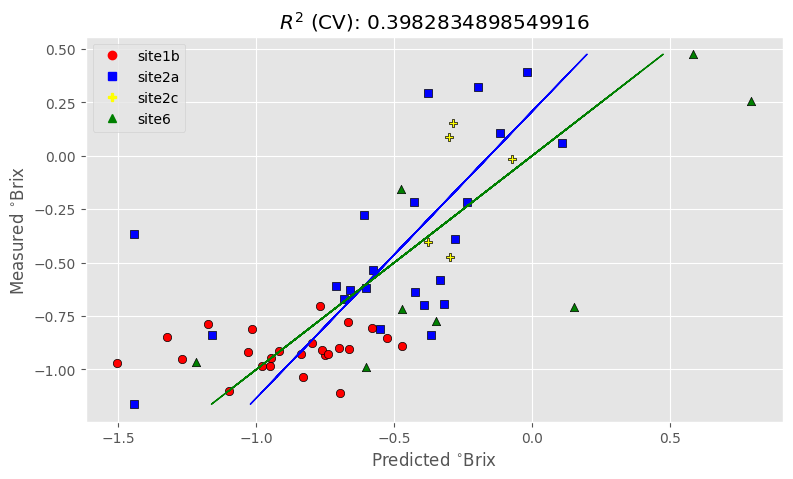

In [73]:
opt_Xc_ldmc, ncomp_ldmc, wav_ldmc, sorted_ind_ldmc = pls_variable_selection(x_ldmc, log_y_weighted_LDMC, 20)
simple_pls_cv(opt_Xc_ldmc, log_y_weighted_LDMC, ncomp_ldmc, labels_ldmc)

In [7]:
def optimise_pls_cv(X, y, n_comp, vol_mois, n_2a, n_1b, n_2c, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    
    print(y_c.shape, type(y_c), y_c[0:27, ])   
    
#     break
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)[:, 0]
    print(y.mean(), y.min(), y.max(), y.shape)
    print(y_cv.mean(), y_cv.min(), y_cv.max(), y_cv.shape)
    
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    p_corr, p_value = pearsonr(y, y_cv)
    print(p_corr, p_value)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    
    


 
    # Fit a line to the CV vs response

    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
       
        ax.scatter(y_c[0:n_2a, ], y[0:n_2a, ], c=vol_mois[0:n_2a, ],  cmap='Spectral', marker= '*',edgecolors='k')
        ax.scatter(y_c[n_2a:n_1b, ], y[n_2a:n_1b, ], c=vol_mois[n_2a:n_1b, ],  cmap='Spectral', marker= 'v',edgecolors='k')
        ax.scatter(y_c[n_1b:n_2c, ], y[n_1b:n_2c, ], c=vol_mois[n_1b:n_2c, ],  cmap='Spectral', marker= '.',edgecolors='k')
#         plt.colorbar()
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

100% completed
Suggested number of components:  4



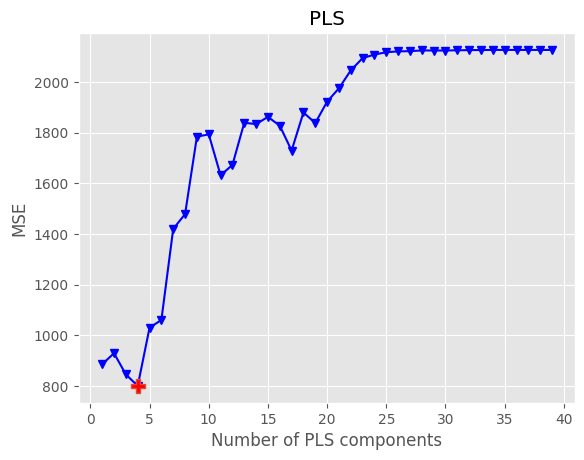

(56, 1) <class 'numpy.ndarray'> [[100.14522519]
 [ 83.44556852]
 [ 82.30072386]
 [ 95.7502133 ]
 [ 89.91668521]
 [ 72.95647577]
 [ 65.81979966]
 [ 90.05550588]
 [ 98.59752861]
 [ 71.97082453]
 [ 74.59151939]
 [110.04590405]
 [ 73.38565248]
 [ 75.989292  ]
 [ 60.00641012]
 [ 79.88287051]
 [ 83.07218245]
 [104.34650163]
 [ 49.56486446]
 [ 88.14917957]
 [ 89.66255983]
 [ 98.01474101]
 [ 77.54400701]
 [ 78.8488547 ]
 [ 82.89128284]
 [ 93.60250684]
 [ 95.85132464]]
97.52951800160714 30.65948379 156.4331066 (56,)
98.14194881957064 54.58155491004162 136.91026429099426 (56,)
0.4022353399517946 0.0021184653748089676
R2 calib: 0.392
R2 CV: 0.122
MSE calib: 554.097
MSE CV: 800.217


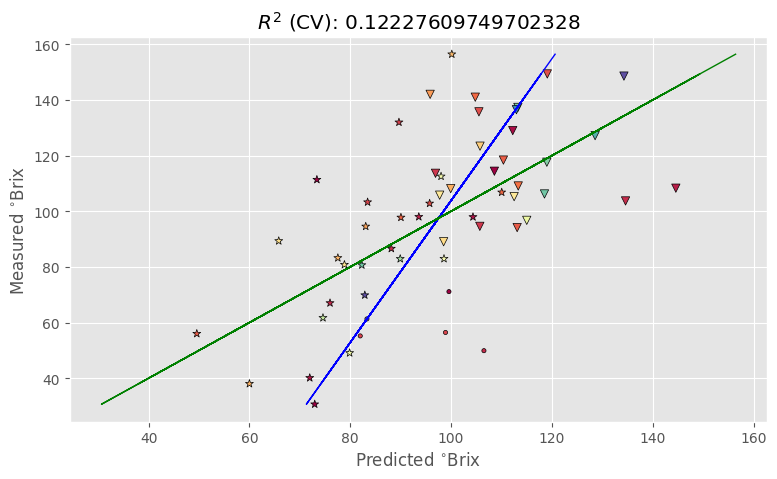

In [8]:
optimise_pls_cv(x_sla,y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



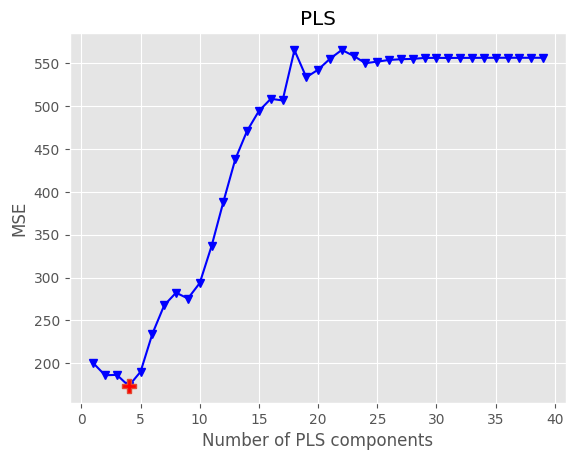

(57, 1) <class 'numpy.ndarray'> [[16.12334583]
 [ 8.64010269]
 [ 0.32257711]
 [13.63182918]
 [ 9.8043189 ]
 [ 1.85828811]
 [ 5.80304817]
 [12.13157419]
 [14.31505597]
 [ 2.1227174 ]
 [ 5.03779966]
 [21.28610393]
 [13.38236389]
 [-3.7934635 ]
 [ 2.25644219]
 [ 1.01631938]
 [16.10958415]
 [ 4.83543848]
 [ 3.06297141]
 [-8.76390189]
 [12.99444201]
 [ 7.59972832]
 [ 8.57117804]
 [ 1.17405755]
 [ 4.38521038]
 [ 7.43526545]
 [10.40477663]]
13.105196248473685 0.382217195 64.9665 (57,)
12.891763435905611 -12.031634986458883 36.17553260363307 (57,)
0.41715084266962005 0.001245778628025292
R2 calib: 0.351
R2 CV: 0.125
MSE calib: 128.861
MSE CV: 173.613


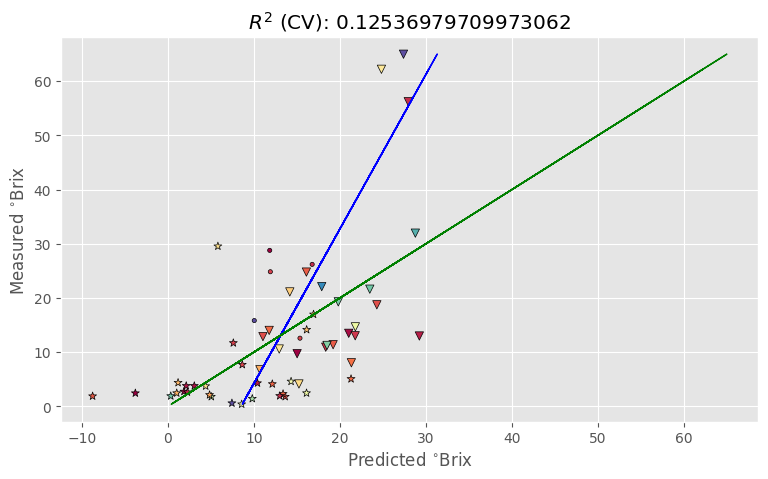

In [11]:
# optimise_pls_cv(x_la,y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



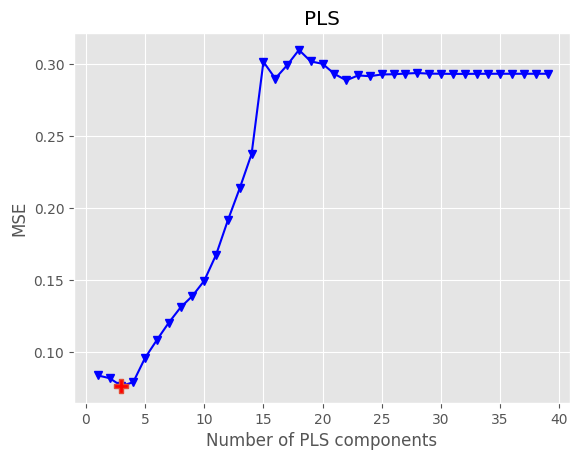

(54, 1) <class 'numpy.ndarray'> [[0.66369326]
 [0.72234145]
 [0.68084528]
 [0.5697319 ]
 [0.61483661]
 [0.92471408]
 [0.66130245]
 [0.55671712]
 [0.6689897 ]
 [0.42838539]
 [0.80581823]
 [0.92088838]
 [1.04383866]
 [0.7519472 ]
 [0.82773806]
 [0.41117845]
 [0.97116268]
 [0.50562356]
 [0.67900353]
 [0.5712629 ]
 [0.76418366]
 [0.7753452 ]
 [0.70404096]
 [0.76575143]
 [0.46294421]
 [0.5229809 ]
 [0.40755549]]
0.5839847452407407 0.312566614 1.482276575 (54,)
0.592443735679536 0.2076726163324087 1.0597301027323587 (54,)
0.362831524622251 0.007008695450962661
R2 calib: 0.373
R2 CV: 0.077
MSE calib: 0.052
MSE CV: 0.077


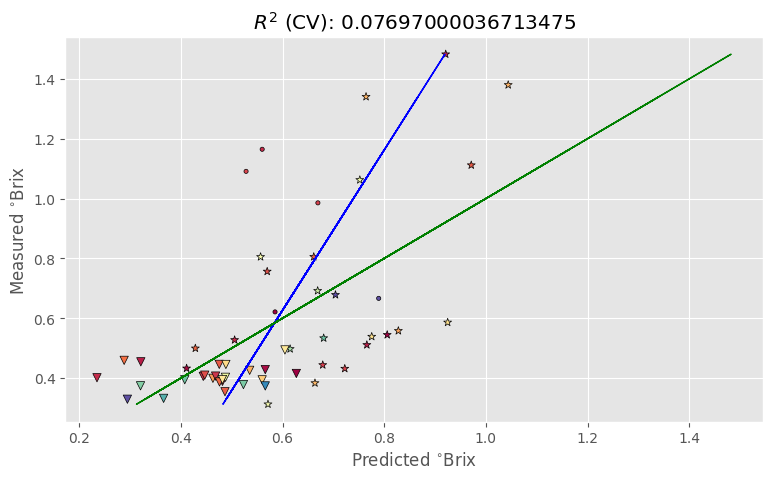

In [12]:
# optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

In [13]:
log_y_weighted_sla = np.log(y_weighted_sla)
log_y_weighted_la = np.log(y_weighted_la)
log_y_weighted_LDMC = np.log(y_weighted_LDMC)

100% completed
Suggested number of components:  3



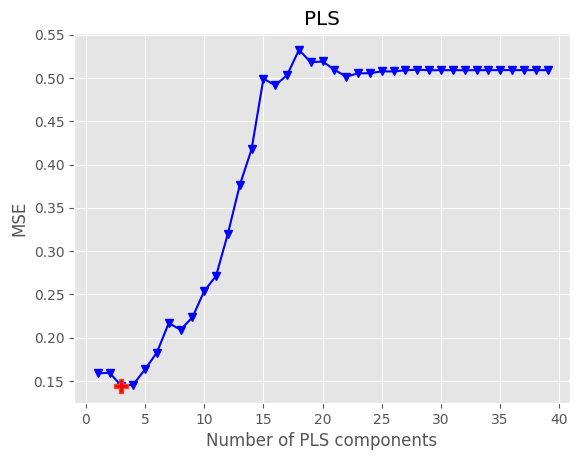

(54, 1) <class 'numpy.ndarray'> [[-0.49479888]
 [-0.4198425 ]
 [-0.47992183]
 [-0.66265903]
 [-0.56789601]
 [-0.12837464]
 [-0.50432847]
 [-0.65811124]
 [-0.48280179]
 [-0.81015351]
 [-0.2958642 ]
 [-0.16154929]
 [ 0.01154481]
 [-0.380775  ]
 [-0.27352672]
 [-0.84344335]
 [-0.06685312]
 [-0.72688334]
 [-0.48299009]
 [-0.64052947]
 [-0.38027062]
 [-0.33993316]
 [-0.43709744]
 [-0.35458853]
 [-0.79700254]
 [-0.7516939 ]
 [-0.89185226]]
-0.6300255935830665 -1.1629376677220686 0.3935791322690429 (54,)
-0.6141439262076958 -1.158650192231192 0.058043104042614035 (54,)
0.4016076053488608 0.002612644321756458
R2 calib: 0.407
R2 CV: 0.108
MSE calib: 0.096
MSE CV: 0.144


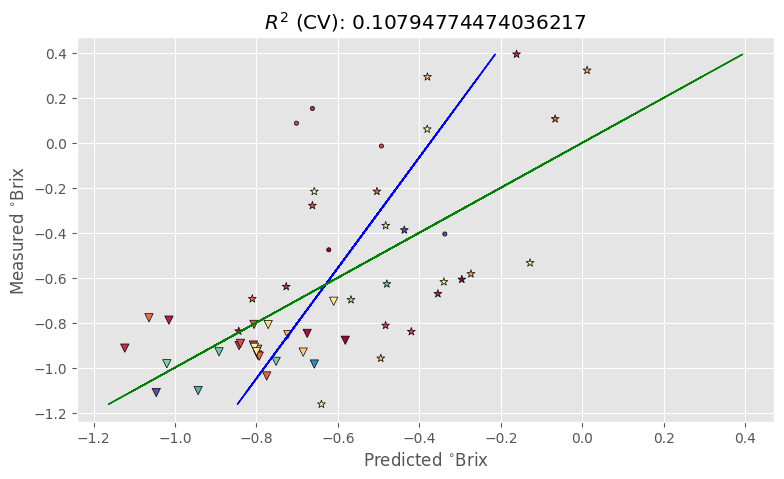

In [14]:
# optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, plot_components=True)
optimise_pls_cv(x_ldmc,log_y_weighted_LDMC, 40, vol_mois_LDMC,LDMC_n_2a, LDMC_n_1b,  LDMC_n_2c, plot_components=True)

100% completed
Suggested number of components:  3



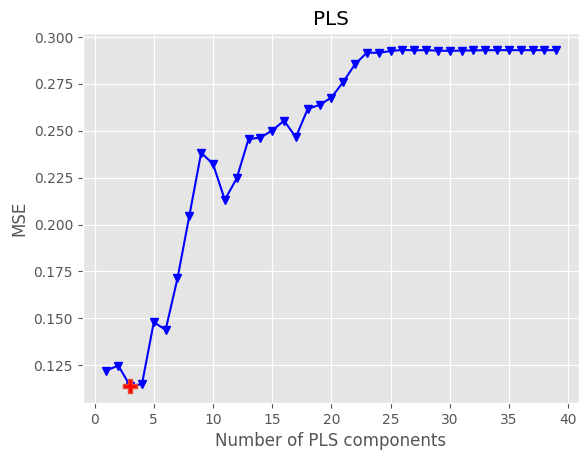

(56, 1) <class 'numpy.ndarray'> [[4.45185281]
 [4.33379357]
 [4.38932534]
 [4.57269872]
 [4.46696097]
 [4.18149313]
 [4.14198082]
 [4.39992236]
 [4.56702273]
 [4.26346354]
 [4.38984078]
 [4.71870934]
 [4.22983289]
 [4.15020909]
 [4.01221974]
 [4.34400018]
 [4.25955715]
 [4.68929539]
 [4.07369156]
 [4.64672207]
 [4.40052694]
 [4.49338197]
 [4.37332484]
 [4.27044994]
 [4.33027231]
 [4.3111235 ]
 [4.65197074]]
4.521913490728343 3.422942036707019 5.0526284847384995 (56,)
4.5184234230319555 4.050354849026919 5.015641281635213 (56,)
0.40833278389209293 0.0017830679096209163
R2 calib: 0.359
R2 CV: 0.132
MSE calib: 0.084
MSE CV: 0.114


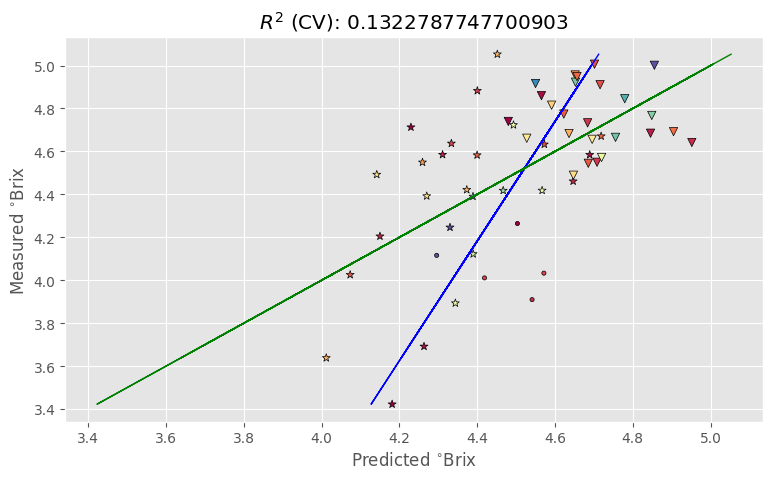

In [15]:
# optimise_pls_cv(x_sla,log_y_weighted_sla, 40, plot_components=True)
optimise_pls_cv(x_sla,log_y_weighted_sla, 40, vol_mois_sla,SLA_n_2a, SLA_n_1b,  SLA_n_2c, plot_components=True)

100% completed
Suggested number of components:  4



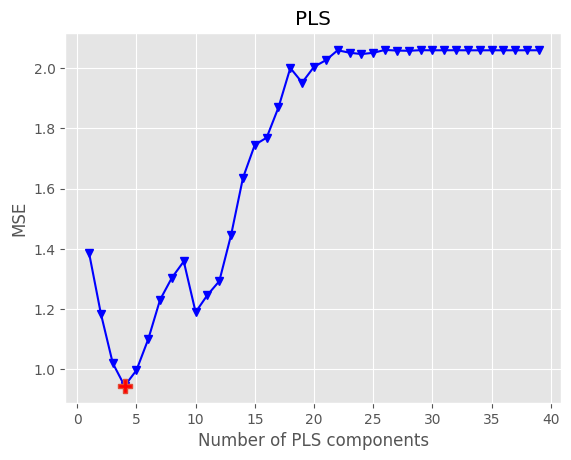

(57, 1) <class 'numpy.ndarray'> [[2.06926206]
 [1.45688824]
 [0.58727726]
 [2.18994256]
 [1.69089744]
 [0.95800027]
 [1.53072841]
 [1.74067221]
 [2.00450621]
 [1.04374863]
 [1.29825609]
 [2.56905049]
 [1.82442281]
 [0.25358621]
 [1.21608696]
 [1.24225437]
 [2.21085015]
 [1.38076871]
 [1.36632003]
 [0.12439473]
 [2.08550819]
 [1.32399447]
 [1.22530281]
 [1.19951706]
 [1.16984556]
 [1.1556189 ]
 [1.54193933]]
2.018387095391922 -0.9617662586536878 4.173871752423952 (57,)
2.0182860733117436 0.02402726998273108 3.4059306453879197 (57,)
0.5341931038481157 1.870943373571431e-05
R2 calib: 0.446
R2 CV: 0.267
MSE calib: 0.715
MSE CV: 0.945


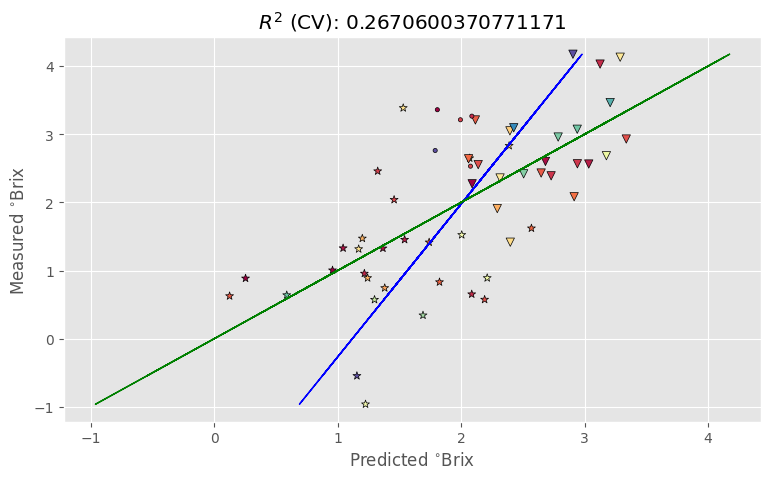

In [16]:
# optimise_pls_cv(x_la,log_y_weighted_la, 40, plot_components=True)
optimise_pls_cv(x_la,log_y_weighted_la, 40, vol_mois_la,LA_n_2a, LA_n_1b,  LA_n_2c, plot_components=True)